C:\Users\dizzy\AppData\Local\Temp\ipykernel_28784\1607277062.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')


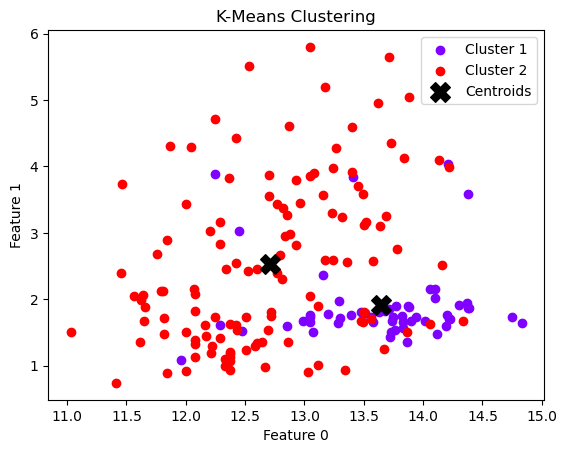

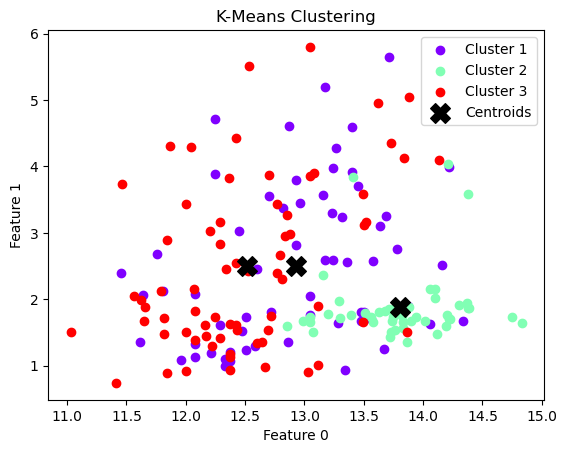

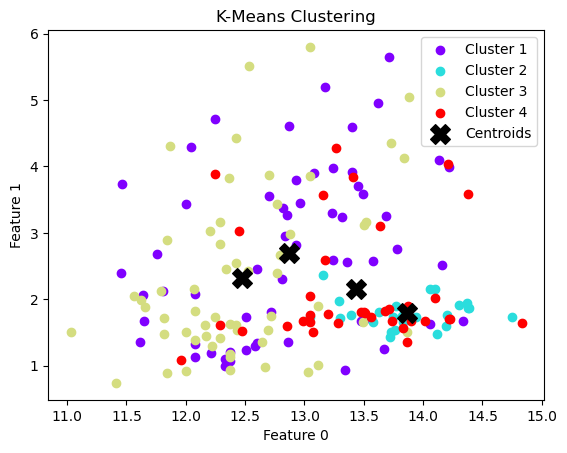

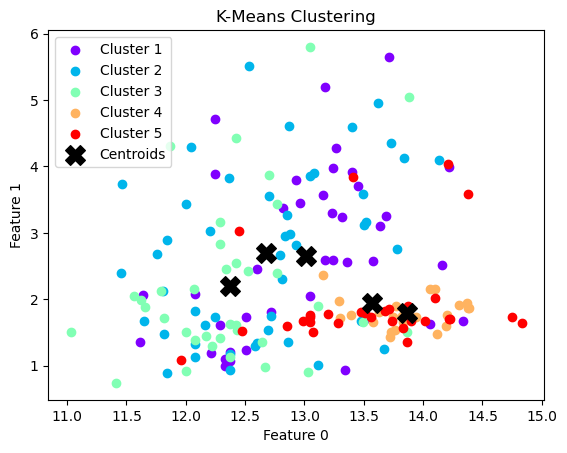

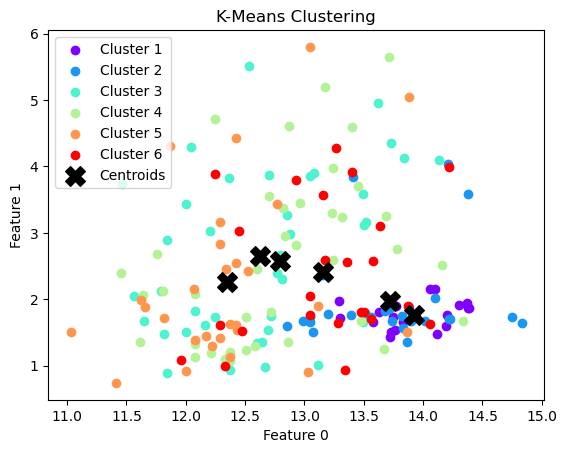

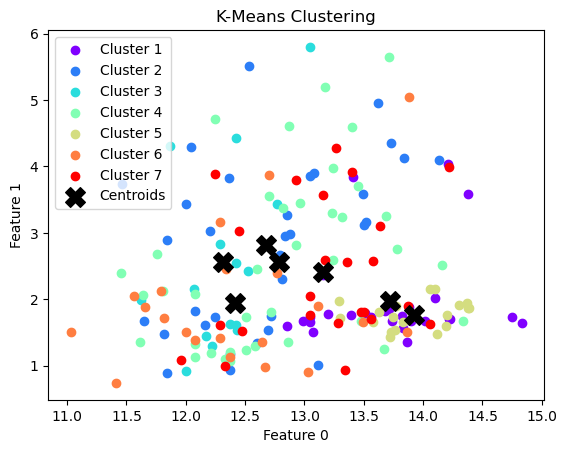

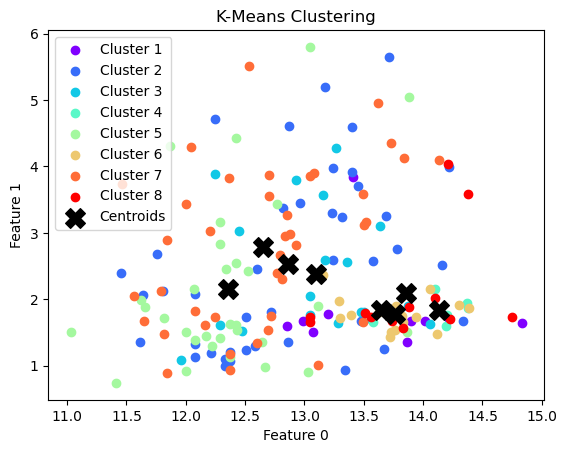

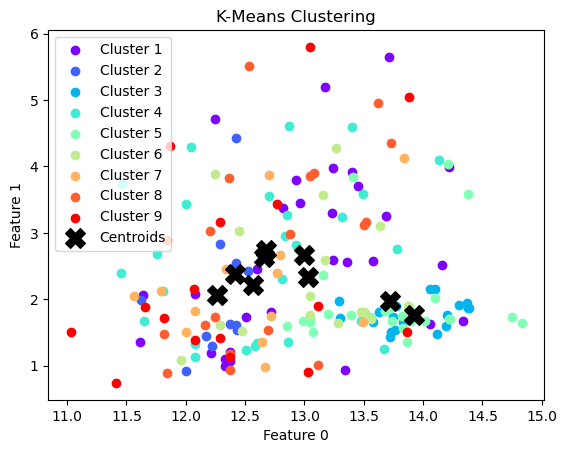

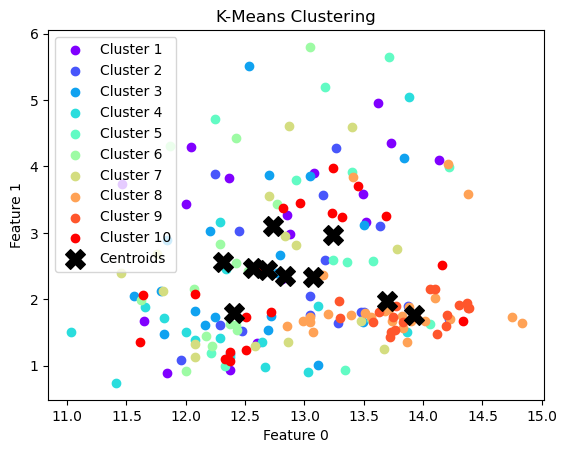

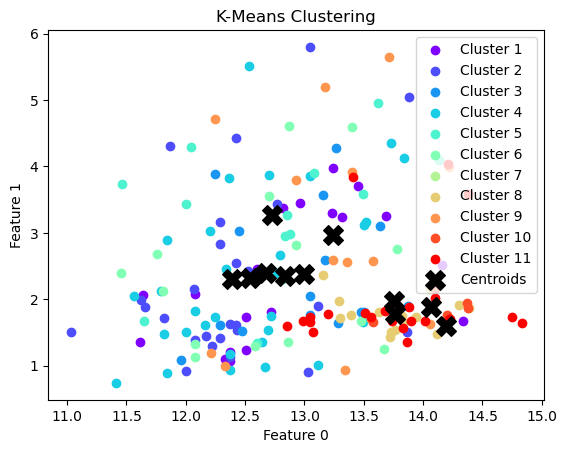

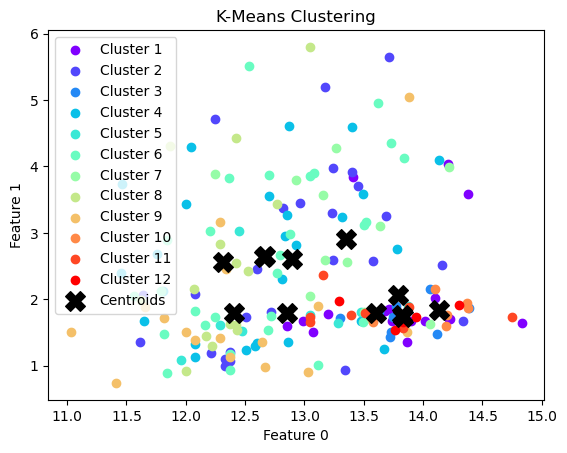

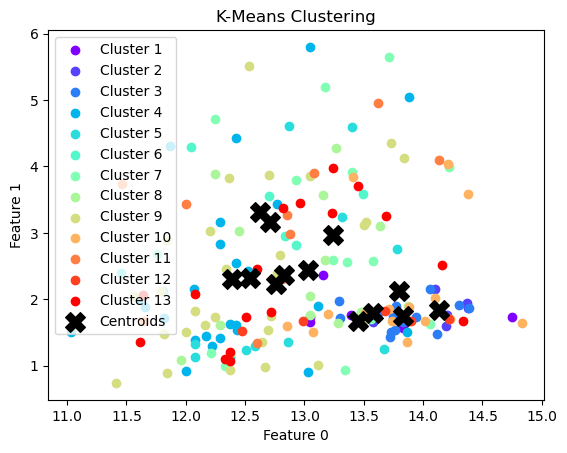

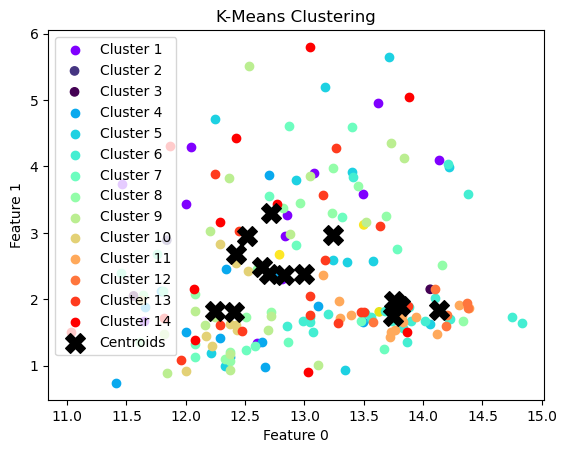

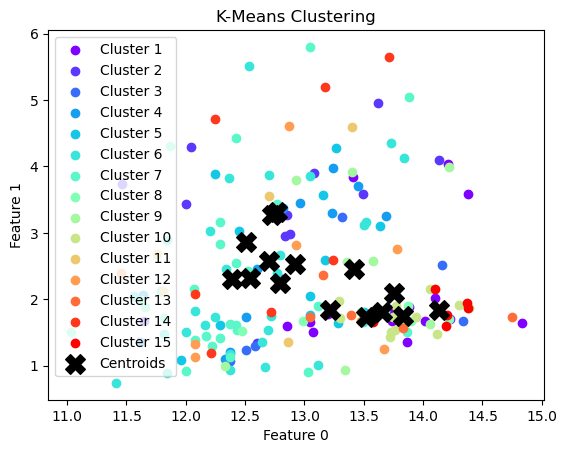

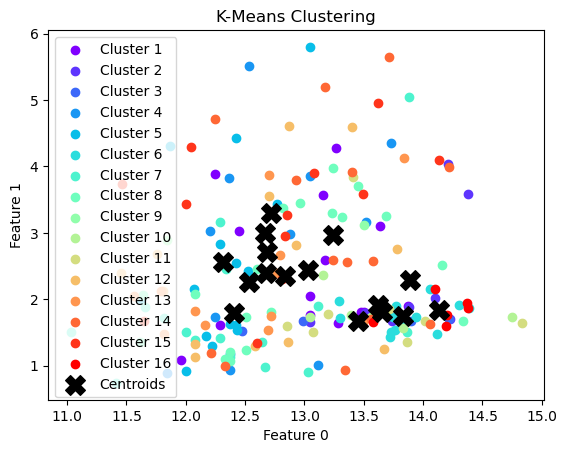

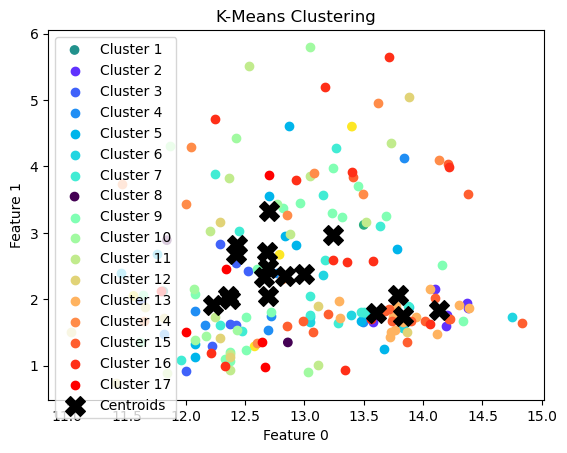

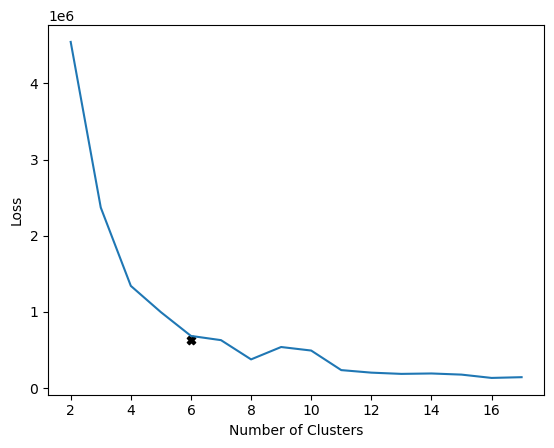

In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.cm as cm
X = pd.read_csv("Kmean_dataset.csv").reset_index(drop=True).values
def kmeans_loss(X, Z):
    dists = np.sum((X[:, np.newaxis, :] - Z[np.newaxis, :, :])**2, axis=-1)
    min_dists = np.min(dists, axis=-1) # shape (n,)
    return np.sum(min_dists)
loss=[]
def kmeans(x, iters, k):
    x=np.array(x, dtype=np.float64)
    centroids = np.array(x[np.random.choice(x.shape[0], k, replace=False)], dtype=np.float64)
    for _ in range(iters):
        distances = np.linalg.norm((x[:, np.newaxis, :]) - (centroids), axis=2)
        labels = np.argmin(distances, axis=1)
        for i in range(k):
            centroids[i] = np.mean(X[labels == i], axis=0)
    loss.append(kmeans_loss(x, centroids))
    colors = cm.rainbow(np.linspace(0, 1, k))
    for i in range(k):
        cluster_points = x[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()
for i in range(2,18):
    kmeans(X, 25, i)
plt.plot(range(2,18),loss)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.scatter(6, loss[5], marker='X', c='black')
plt.show()